# Importing necessary libraries

In [296]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [297]:
cancer  = pd.read_csv('data.csv')

In [298]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [299]:
cancer.drop('Unnamed: 32',axis=1,inplace=True)

In [300]:
cancer.drop('id',axis=1,inplace=True)

In [301]:
cancer.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [302]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [303]:
cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [304]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [305]:
diagnosis = {'B':0,'M':1}

In [306]:
cancer.diagnosis = [diagnosis[item] for item in cancer.diagnosis]

In [308]:
df = cancer.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [309]:
df.drop('diagnosis',axis=1,inplace=True)

In [310]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# standardizing data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(df)

StandardScaler()

In [20]:
scaled_data = scaler.transform(df)

In [21]:
scaled_data.shape

(569, 30)

In [131]:
df1 = pd.DataFrame(scaled_data, columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

# calculating Principal components and corresponding loads

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca_1  = PCA(n_components=1)

In [24]:
pca_1.fit(scaled_data)

PCA(n_components=1)

In [25]:
y_pca = pca_1.transform(scaled_data)

In [26]:
y_pca.shape

(569, 1)

Text(0.5, 0, 'First principal component')

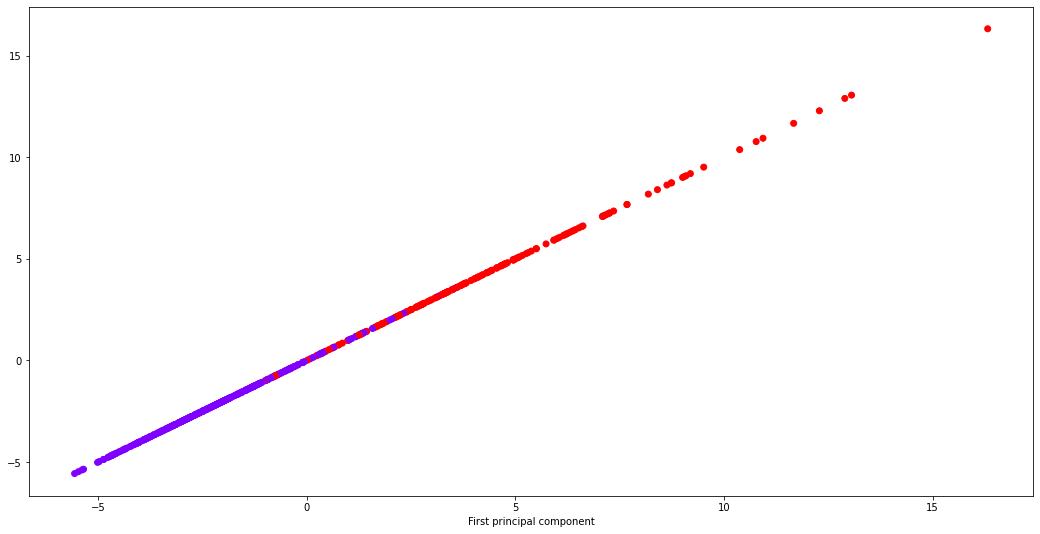

In [28]:
fig = plt.figure(figsize=(18,9))
plt.scatter(y_pca[:,0],y_pca[:,0],c=cancer['diagnosis'],cmap='rainbow')
plt.xlabel('First principal component')

In [29]:
pca_2  = PCA(n_components=2)

In [30]:
pca_2.fit(scaled_data)

PCA(n_components=2)

In [31]:
y_pca2 = pca_2.transform(scaled_data)

In [32]:
y_pca2.shape

(569, 2)

Text(0, 0.5, 'Second principal component')

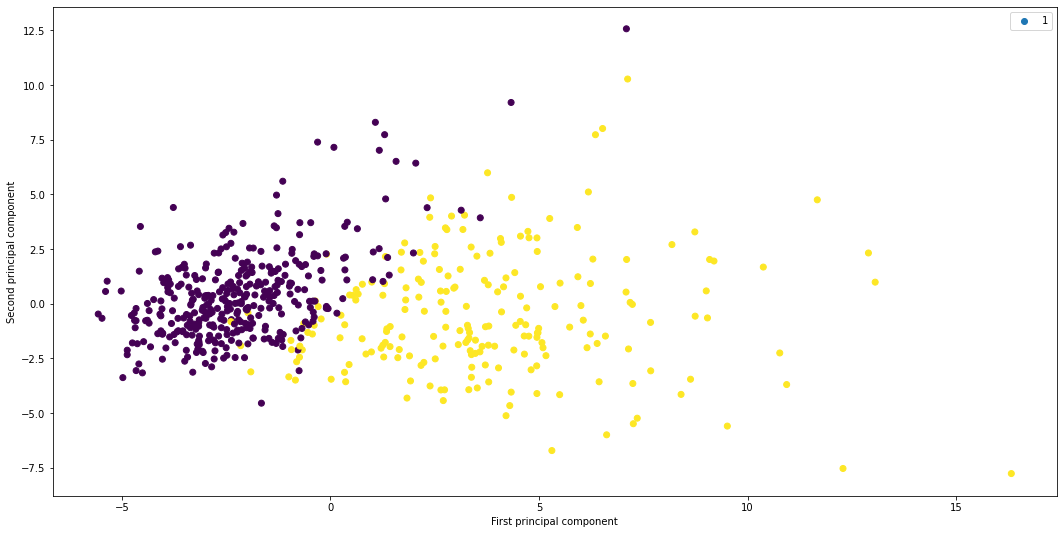

In [33]:
fig = plt.figure(figsize=(18,9))
plt.scatter(y_pca2[:,0],y_pca2[:,1],c=cancer['diagnosis'],cmap='viridis')
plt.legend(cancer['diagnosis'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [34]:
pca_3  = PCA(n_components=3)

In [35]:
pca_3.fit(scaled_data)

PCA(n_components=3)

In [36]:
x_pca = pca_3.transform(scaled_data)

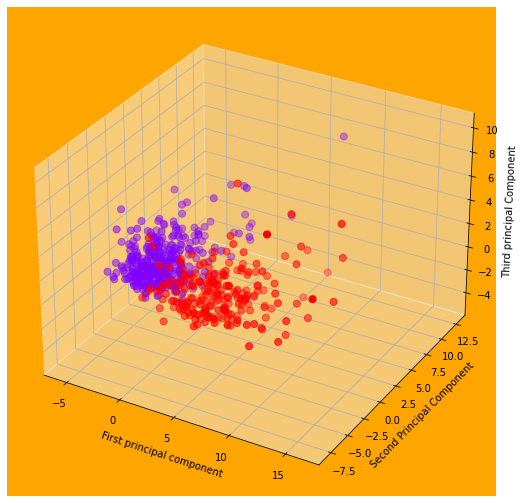

In [39]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=cancer['diagnosis'],cmap='rainbow',s=50)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third principal Component')
ax.set_facecolor('orange')

In [40]:
pca  = PCA()

In [41]:
x_pca1  = pca.fit_transform(scaled_data)

In [42]:
x_pca1.shape

(569, 30)

In [44]:
pca.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

# lambda > 1 (kaiser's rule) shows for first six principal components, so we consider 6 components for analysis according to kaiser's rule

In [46]:
pca.explained_variance_ratio_.cumsum()*100

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

# Six PCs together shows 88.75 percentage variability in the data

In [47]:
a = {"variance":pca.explained_variance_,"cummulative_sum":pca.explained_variance_ratio_.cumsum(),"pca":np.arange(start=1, stop=31, step=1)}
pca_df = pd.DataFrame(a)
pca_df

,variance,cummulative_sum,pca
0,13.304991,0.442720,1
1,5.701375,0.632432,2
2,2.822910,0.726364,3
3,1.984128,0.792385,4
4,1.651633,0.847343,5
5,1.209482,0.887588,6
6,0.676409,0.910095,7
7,0.477456,0.925983,8
8,0.417629,0.939879,9
9,0.351311,0.951569,10


# Relative plots

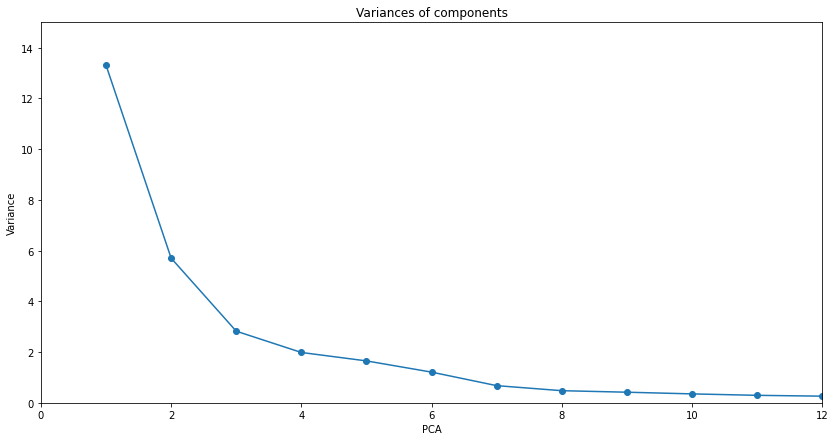

In [48]:
plt.figure(figsize=(14,7))
plt.xlim([0, 12])
plt.ylim([0,15])
plt.scatter(pca_df['pca'],pca_df['variance'],cmap='viridis')
plt.title("Variances of components")
plt.xlabel("PCA")
plt.ylabel("Variance")
plt.plot(pca_df['pca'],pca_df['variance'])

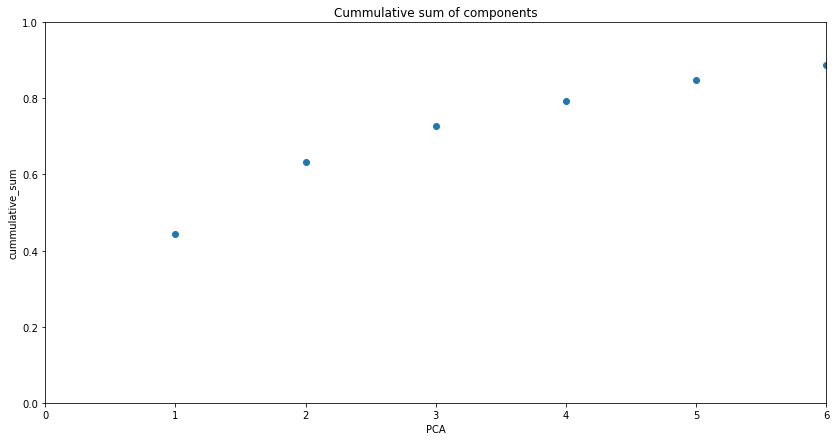

In [49]:
plt.figure(figsize=(14,7))
plt.xlim([0, 6])
plt.ylim([0,1])
plt.scatter(pca_df['pca'],pca_df['cummulative_sum'],cmap='viridis')
plt.title('Cummulative sum of components')
plt.xlabel('PCA')
plt.ylabel('cummulative_sum')
plt.plot(pca_df['pca'],pca_df['variance'],marker='o')

# Note: For obtaining 0.97 variance, so we take the total components of 12

In [97]:
pca = PCA(n_components=12)
pca.fit(scaled_data)

print("Eigenvalues:")
print(pca.explained_variance_)
print()
print("Variances (Percentage):")
print(pca.explained_variance_ratio_*100)
print()
print("EigenVectors")
print(pca.components_)

Eigenvalues:
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087  0.29443315  0.26162116]

Variances (Percentage):
[44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204
  2.25073371  1.5887238   1.38964937  1.16897819  0.97971899  0.8705379 ]

EigenVectors
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.6657

In [55]:
final_pca = x_pca1[:,:12]

In [56]:
final_pca.shape

(569, 12)

In [57]:
pca_df1 = pd.DataFrame( data =  final_pca,
                    columns = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])

In [60]:
pca_df1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515
...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461


In [61]:
pca_df1['target'] = cancer['diagnosis']

In [65]:
pca_df1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,1
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,1
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,1
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1


In [67]:
X = pca_df1.loc[: , 'pc1':'pc12']
y = pca_df1.loc[:,'target']

# Eigenvalues greater than 1.0 should be taken as principal components(PC) as for kaiser rule

# Data Visualization using PCs

## Histogram of first 3 PCs

In [74]:
pca_3

PCA(n_components=3)

In [75]:
df_comp3 = pd.DataFrame(pca_3.components_,columns=[ 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst'])

<AxesSubplot:ylabel='Count'>

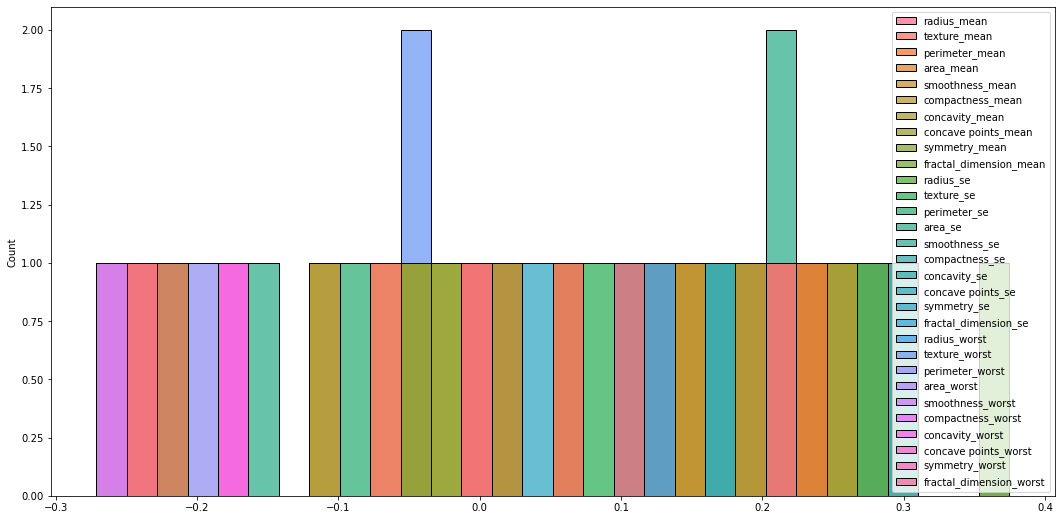

In [76]:
fig = plt.figure(figsize=(18,9))
sns.histplot(data=df_comp3,bins=30)

# Visualizing First and Second pcs

C:\Users\AKHILA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

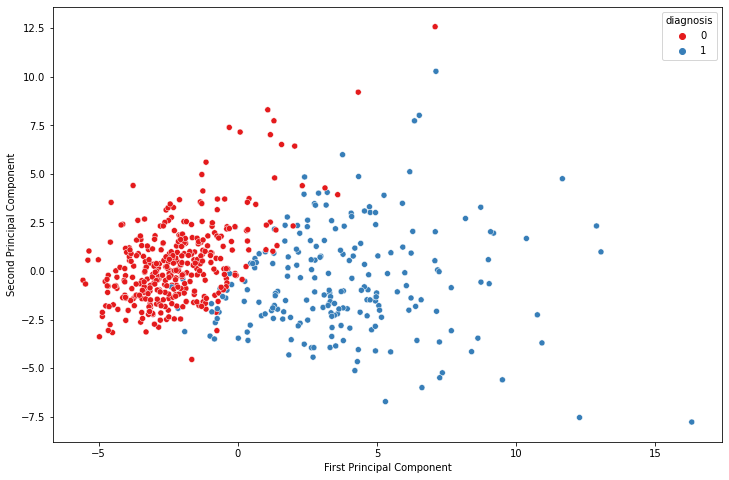

In [78]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=cancer['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Visualizing First and Third pcs

C:\Users\AKHILA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Third Principal Component')

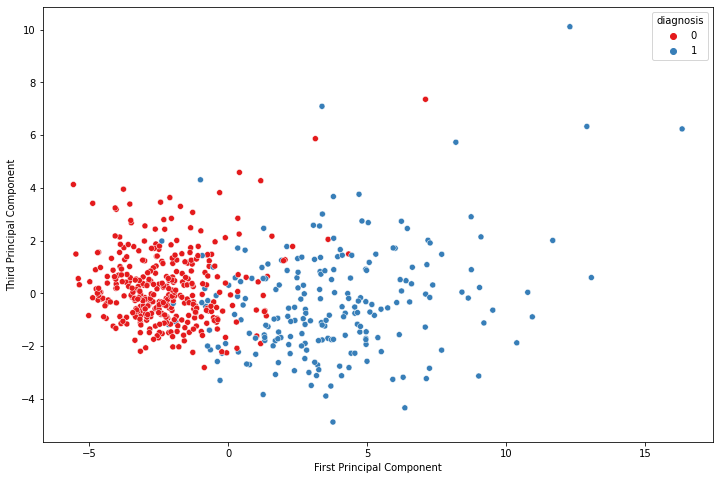

In [79]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,2],hue=cancer['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

# Visualizing Second and Third pcs

C:\Users\AKHILA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Third Principal Component')

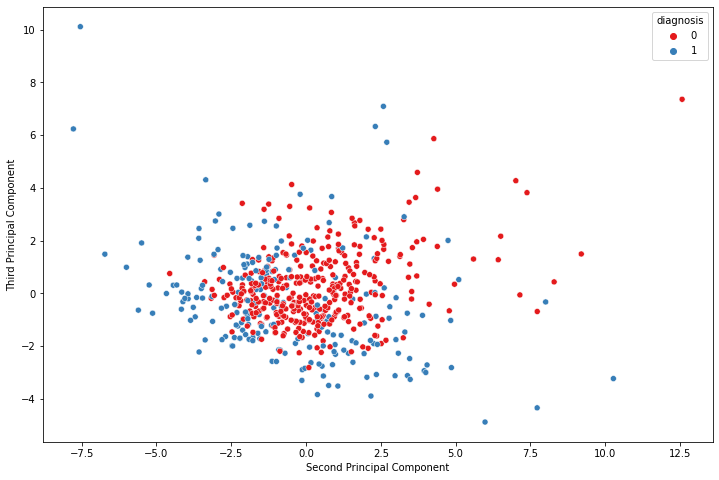

In [80]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue=cancer['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

# ** First and Second Pcs Plot shows better visual seperation

In [81]:
df_comp1 = pd.DataFrame(pca_1.components_,columns=[ 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst'])

In [82]:
df_comp2 = pd.DataFrame(pca_2.components_,columns=[ 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst'])

# Heatmap of First 3 components

<AxesSubplot:>

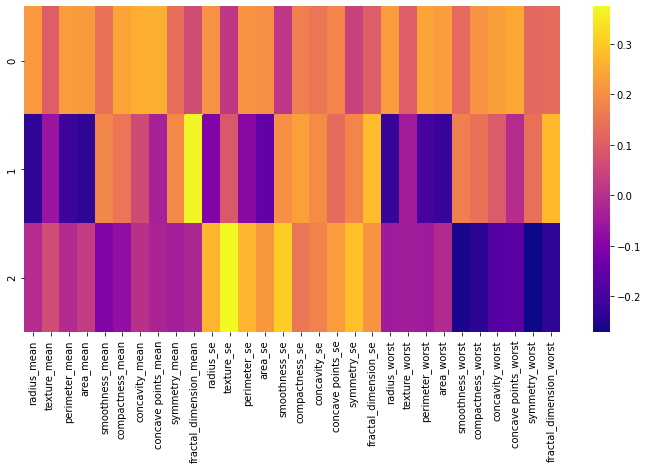

In [83]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp3,cmap='plasma',)

# Heatmap of First 2 components

<AxesSubplot:>

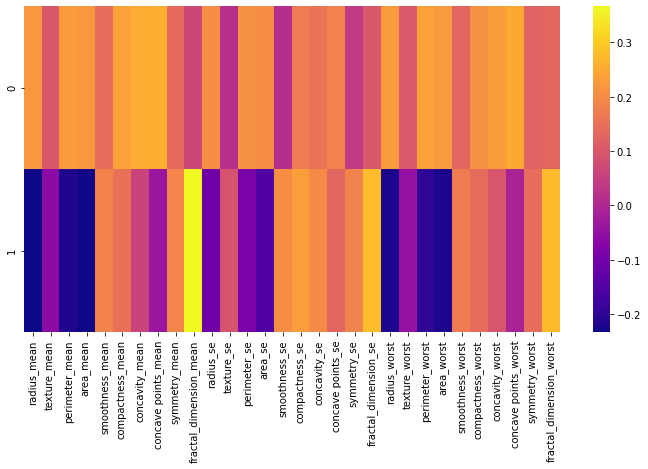

In [84]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp2,cmap='plasma',)

# Heatmap of First component

<AxesSubplot:>

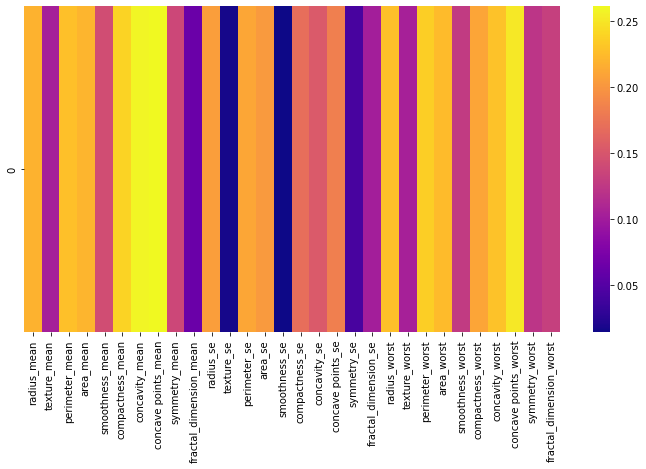

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp1,cmap='plasma',)

Text(0.5, 1.0, 'Diagnosis vs radius_mean')

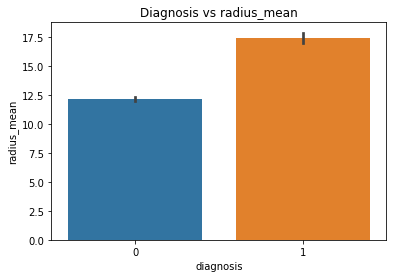

In [87]:
sns.barplot(x = 'diagnosis', y = 'radius_mean', data = cancer)
plt.title('Diagnosis vs radius_mean')

Text(0.5, 1.0, 'Diagnosis vs texture_mean')

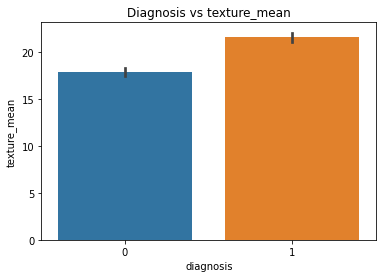

In [88]:
sns.barplot(x = 'diagnosis', y = 'texture_mean', data = cancer)
plt.title('Diagnosis vs texture_mean')

Text(0.5, 1.0, 'Diagnosis vs perimeter_mean')

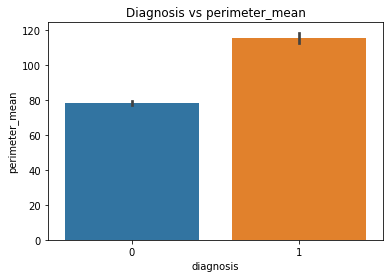

In [89]:
sns.barplot(x = 'diagnosis', y = 'perimeter_mean', data = cancer)
plt.title('Diagnosis vs perimeter_mean')

Text(0.5, 1.0, 'Diagnosis vs area_mean')

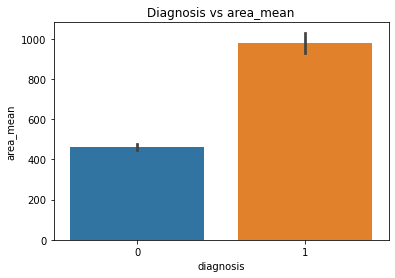

In [90]:
sns.barplot(x = 'diagnosis', y = 'area_mean', data = cancer)
plt.title('Diagnosis vs area_mean')

Text(0.5, 1.0, 'Diagnosis vs smoothness_mean')

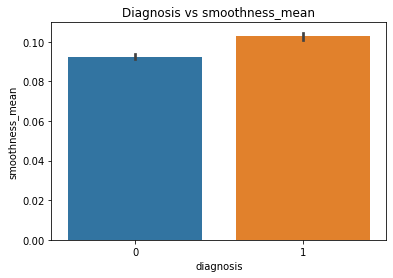

In [91]:
sns.barplot(x = 'diagnosis', y = 'smoothness_mean', data = cancer)
plt.title('Diagnosis vs smoothness_mean')

Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

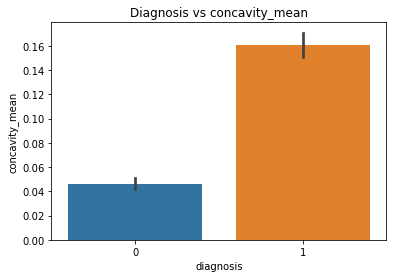

In [92]:
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = cancer)
plt.title('Diagnosis vs concavity_mean')

Text(0.5, 1.0, 'Diagnosis vs concave points_mean')

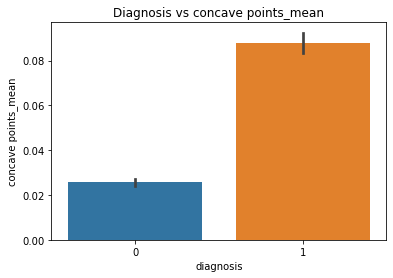

In [93]:
sns.barplot(x = 'diagnosis', y = 'concave points_mean', data = cancer)

plt.title('Diagnosis vs concave points_mean')

Text(0.5, 1.0, 'Diagnosis vs symmetry_mean')

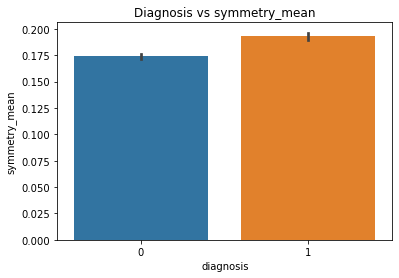

In [94]:
sns.barplot(x = 'diagnosis', y = 'symmetry_mean', data = cancer)

plt.title('Diagnosis vs symmetry_mean')

Text(0.5, 1.0, 'Diagnosis vs fractal_dimension_mean')

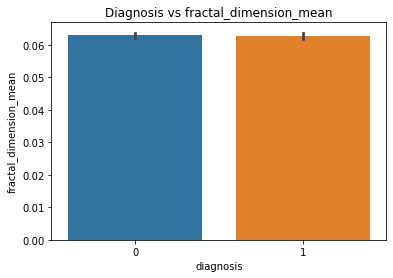

In [95]:
sns.barplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = cancer)

plt.title('Diagnosis vs fractal_dimension_mean')

# Correlation matrix

<AxesSubplot:>

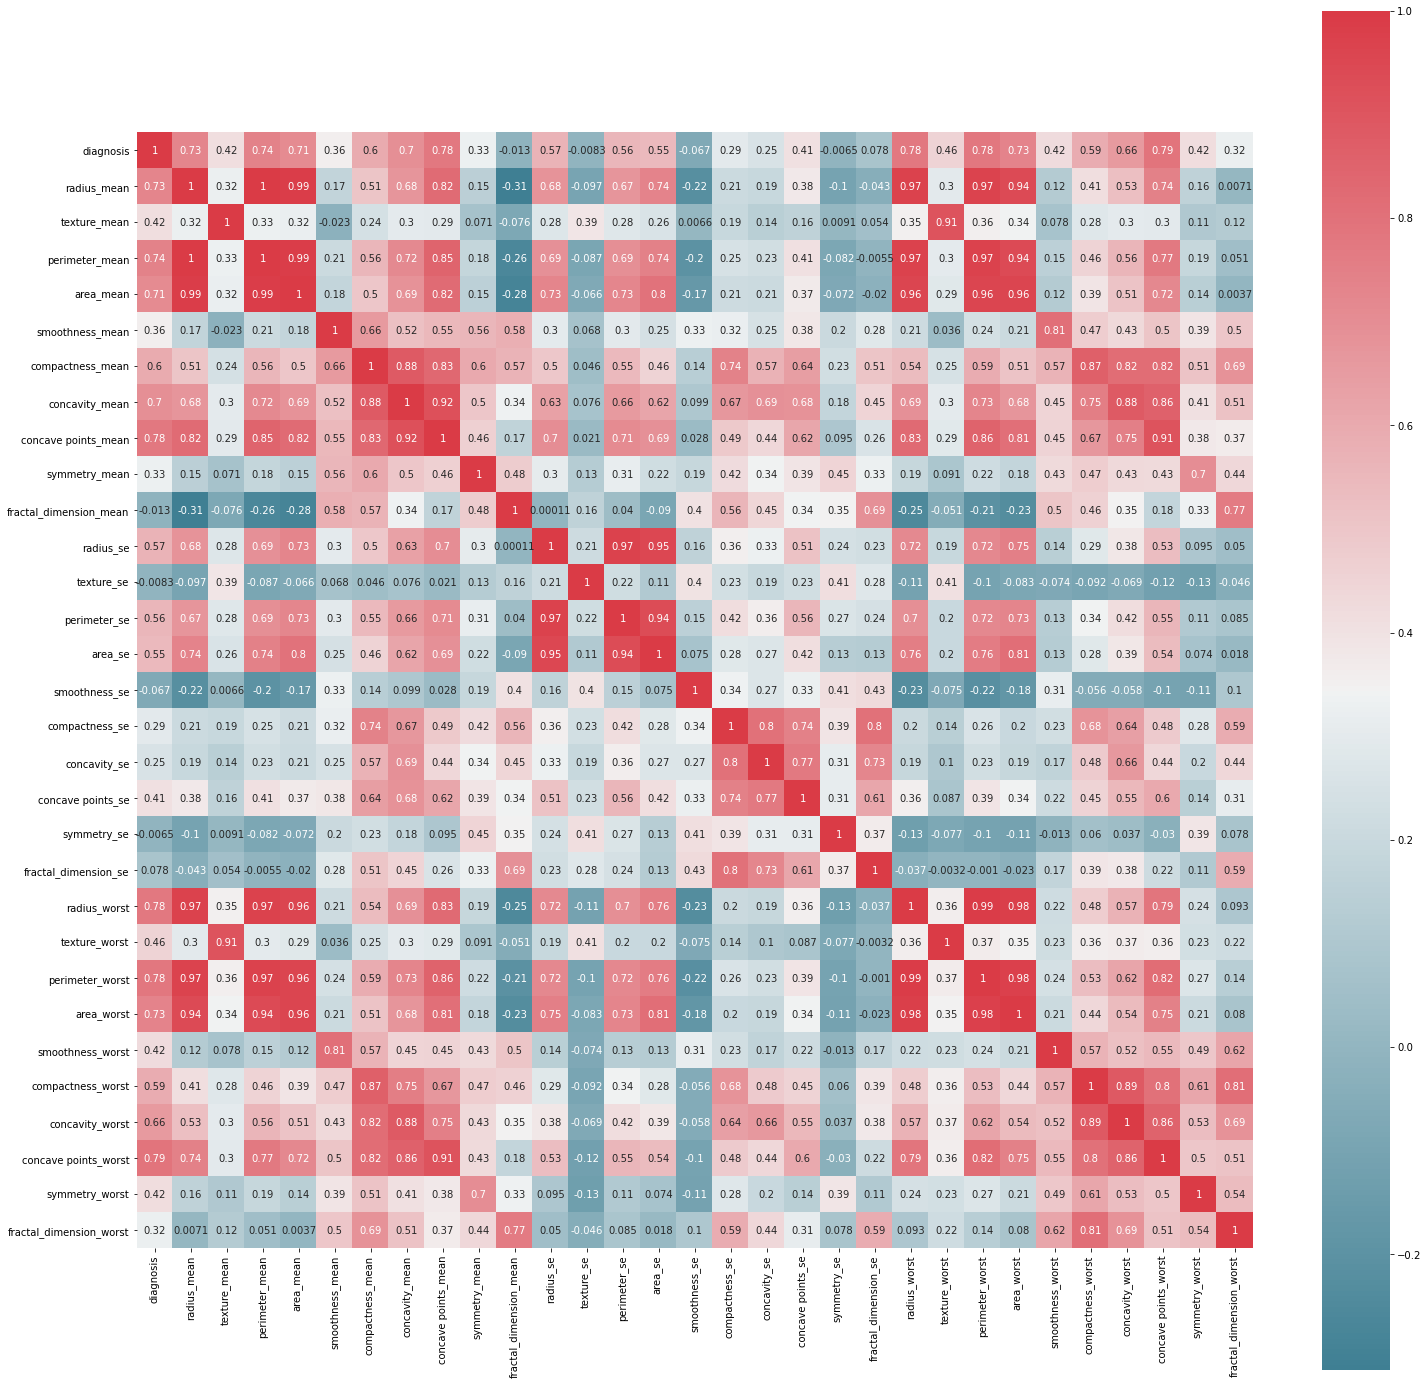

In [96]:
f, ax = plt.subplots(figsize=(25, 25))
corr = cancer.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# KMeans Clustering for k=2

### clustering 3 times from randomly generated centres

In [154]:
kmeans2_1 = KMeans(n_clusters = 2, init = 'random', random_state = 0).fit(df1)

In [155]:
kmeans2_1.cluster_centers_

array([[ 0.93362406,  0.4620646 ,  0.96730462,  0.92424266,  0.60116657,
         1.01678879,  1.11927003,  1.13499581,  0.59745592,  0.28828783,
         0.82729086,  0.0408053 ,  0.83306382,  0.77658149,  0.0460656 ,
         0.71559384,  0.64677371,  0.76877382,  0.14483925,  0.45777508,
         1.00100618,  0.48610441,  1.02895252,  0.96525332,  0.61097579,
         0.95149718,  1.0377126 ,  1.12132923,  0.58638203,  0.65089347],
       [-0.48299485, -0.23904142, -0.50041892, -0.47814154, -0.3110035 ,
        -0.52601873, -0.57903569, -0.58717117, -0.30908386, -0.1491409 ,
        -0.42798514, -0.02110994, -0.43097168, -0.40175149, -0.02383127,
        -0.37020054, -0.3345976 , -0.39771232, -0.07493017, -0.23682231,
        -0.51785387, -0.25147802, -0.53231144, -0.49935772, -0.31607814,
        -0.49224121, -0.53684332, -0.58010099, -0.30335497, -0.33672889]])

In [156]:
model = kmeans2_1.predict(df1)

In [157]:
score2_1 = davies_bouldin_score(df, model)

In [158]:
print(score2_1)

0.821652155921257


In [159]:
kmeans2_2 = KMeans(n_clusters = 2, init = 'random', random_state = 11).fit(df1)

In [160]:
kmeans2_2.cluster_centers_

array([[-0.48442497, -0.23948977, -0.50066826, -0.47922799, -0.30302374,
        -0.50766196, -0.56671617, -0.57922637, -0.30396101, -0.12545115,
        -0.4270387 , -0.02125791, -0.42787555, -0.40142988, -0.00848542,
        -0.34569618, -0.31677152, -0.38607654, -0.06982168, -0.20642387,
        -0.51730476, -0.25182285, -0.53018015, -0.49893721, -0.3025456 ,
        -0.47291642, -0.51940106, -0.57008917, -0.29713594, -0.30959659],
       [ 0.97397614,  0.48151381,  1.0066346 ,  0.96352718,  0.60925407,
         1.020696  ,  1.13942935,  1.16458212,  0.61113855,  0.25222982,
         0.85859633,  0.04274078,  0.86027888,  0.8071077 ,  0.01706063,
         0.69505052,  0.63689512,  0.77623856,  0.14038222,  0.41503212,
         1.04008365,  0.50631048,  1.06597067,  1.00315418,  0.60829274,
         0.95083725,  1.04429844,  1.14621103,  0.59741617,  0.62246932]])

In [161]:
model = kmeans2_2.predict(df1)

In [162]:
score2_2 = davies_bouldin_score(df1, model)

In [163]:
print(score2_2)

1.3123202103574445


In [164]:
kmeans2_3 = KMeans(n_clusters = 2, init = 'random', random_state = 17).fit(df1)

In [165]:
kmeans2_3.cluster_centers_

array([[-0.48299485, -0.23904142, -0.50041892, -0.47814154, -0.3110035 ,
        -0.52601873, -0.57903569, -0.58717117, -0.30908386, -0.1491409 ,
        -0.42798514, -0.02110994, -0.43097168, -0.40175149, -0.02383127,
        -0.37020054, -0.3345976 , -0.39771232, -0.07493017, -0.23682231,
        -0.51785387, -0.25147802, -0.53231144, -0.49935772, -0.31607814,
        -0.49224121, -0.53684332, -0.58010099, -0.30335497, -0.33672889],
       [ 0.93362406,  0.4620646 ,  0.96730462,  0.92424266,  0.60116657,
         1.01678879,  1.11927003,  1.13499581,  0.59745592,  0.28828783,
         0.82729086,  0.0408053 ,  0.83306382,  0.77658149,  0.0460656 ,
         0.71559384,  0.64677371,  0.76877382,  0.14483925,  0.45777508,
         1.00100618,  0.48610441,  1.02895252,  0.96525332,  0.61097579,
         0.95149718,  1.0377126 ,  1.12132923,  0.58638203,  0.65089347]])

In [166]:
model = kmeans2_3.predict(df1)

In [167]:
score2_3 = davies_bouldin_score(df1, model)

In [168]:
print(score2_3)

1.3205098372342037


### Here, the Davies-Bouldin index is least for score2_2 and that corresponding cluster centroids coordinates are selected for k=2

## KMeans Clustering for k=3

### clustering 3 times from randomly generated centres

In [169]:
kmeans3_1 = KMeans(n_clusters = 3, init = 'random', random_state = 0).fit(df1)

In [170]:
kmeans3_1.cluster_centers_

array([[-0.17232895,  0.17898672, -0.10074437, -0.22001438,  0.84922567,
         1.03543143,  0.78100563,  0.49942706,  0.75279302,  1.18398151,
        -0.08502958,  0.02340245, -0.01783062, -0.17235697,  0.43965152,
         1.07468661,  0.89050757,  0.75214074,  0.28645615,  1.0264176 ,
        -0.08822954,  0.31146754, -0.00701494, -0.15647731,  0.96915045,
         1.17977172,  1.0450547 ,  0.74299822,  0.80991644,  1.38461312],
       [ 1.61908207,  0.62661289,  1.6240009 ,  1.66315361,  0.39856469,
         0.93061442,  1.23933718,  1.48697008,  0.43217049, -0.2869193 ,
         1.44128466,  0.0938201 ,  1.40538059,  1.42350487, -0.07267167,
         0.47907229,  0.43975291,  0.78783453,  0.05442714,  0.11903767,
         1.66674915,  0.54289966,  1.65684176,  1.68494744,  0.33688865,
         0.67029147,  0.88661143,  1.27318238,  0.30034644,  0.08406585],
       [-0.44809508, -0.2418554 , -0.46954224, -0.44831604, -0.358676  ,
        -0.57356749, -0.59729151, -0.59473375, -0

In [171]:
model = kmeans3_1.predict(df1)

In [172]:
score3_1 = davies_bouldin_score(df1, model)

In [173]:
print(score3_1)

1.5293883767807952


In [174]:
kmeans3_2 = KMeans(n_clusters = 3, init = 'random', random_state = 35).fit(df1)

In [175]:
kmeans3_2.cluster_centers_

array([[ 1.54031547,  0.60244312,  1.54520436,  1.57048757,  0.40508927,
         0.89297348,  1.18714807,  1.4228224 ,  0.42058151, -0.29218377,
         1.34899197,  0.06294244,  1.31105513,  1.32807279, -0.09306897,
         0.44279109,  0.41110952,  0.74413218,  0.01370624,  0.0965535 ,
         1.59475503,  0.53501407,  1.58332941,  1.59973609,  0.36244564,
         0.66131997,  0.87116159,  1.24292979,  0.30716685,  0.09953232],
       [-0.21761382,  0.16532806, -0.14383539, -0.26086902,  0.8426837 ,
         1.04201149,  0.77084681,  0.47683058,  0.76271014,  1.24495043,
        -0.10495755,  0.04147064, -0.03169565, -0.19446142,  0.47721585,
         1.11715942,  0.92594545,  0.77740259,  0.31925039,  1.08304162,
        -0.14094698,  0.29506232, -0.05572937, -0.20497997,  0.95077906,
         1.17952496,  1.03676272,  0.71432597,  0.80024297,  1.4137318 ],
       [-0.46374165, -0.24858571, -0.4851982 , -0.46236145, -0.36346233,
        -0.58233873, -0.60928874, -0.61027569, -0

In [176]:
model = kmeans3_2.predict(df1)

In [177]:
score3_2 = davies_bouldin_score(df1, model)

In [178]:
print(score3_2)

1.5406221736318724


In [179]:
kmeans3_3 = KMeans(n_clusters = 3, init = 'random', random_state = 42).fit(df1)

In [180]:
kmeans3_3.cluster_centers_

array([[-0.44809508, -0.2418554 , -0.46954224, -0.44831604, -0.358676  ,
        -0.57356749, -0.59729151, -0.59473375, -0.34211158, -0.24188587,
        -0.41793414, -0.03526589, -0.42565126, -0.38816111, -0.10019852,
        -0.44614655, -0.38279548, -0.45090772, -0.09646964, -0.32238413,
        -0.48612661, -0.25310785, -0.50571337, -0.47269217, -0.37318328,
        -0.534009  , -0.56276526, -0.59707489, -0.31763162, -0.41144444],
       [-0.19232279,  0.16475741, -0.11976482, -0.2386995 ,  0.85894687,
         1.03569323,  0.780751  ,  0.49862234,  0.76071408,  1.21416954,
        -0.09567211,  0.03263716, -0.02314927, -0.18350453,  0.45707998,
         1.07939946,  0.9033752 ,  0.76810674,  0.28973804,  1.04206091,
        -0.11283378,  0.29873881, -0.02860925, -0.18027837,  0.96653568,
         1.16396858,  1.03440916,  0.73610035,  0.78724738,  1.38327488],
       [ 1.60458721,  0.6310702 ,  1.60984478,  1.64587508,  0.39810616,
         0.93225708,  1.23137549,  1.47003951,  0

In [181]:
model = kmeans3_3.predict(df1)

In [182]:
score3_3 = davies_bouldin_score(df1, model)

In [183]:
print(score3_3)

1.529730895139364


### Here, the Davies-Bouldin index is least for score3_1 and that corresponding cluster centroids coordinates are selected for k=3

## KMeans Clustering for k=5

### clustering 3 times from randomly generated centres

In [184]:
kmeans5_1 = KMeans(n_clusters = 5, init = 'random', random_state = 0).fit(df1)

In [185]:
kmeans5_1.cluster_centers_

array([[-8.55858793e-01, -1.46658336e-01, -8.42899724e-01,
        -7.69271974e-01,  2.30772611e-01, -3.09683079e-01,
        -5.12418371e-01, -5.75643020e-01,  1.20339041e-01,
         4.55225372e-01, -3.00522801e-01,  5.73247569e-01,
        -2.93530816e-01, -3.99896046e-01,  7.41182008e-01,
        -4.28653165e-02, -1.23304927e-01, -7.22878176e-02,
         4.18863862e-01,  1.85585092e-01, -8.28441454e-01,
        -1.94181547e-01, -8.14687434e-01, -7.27319464e-01,
         1.11325383e-01, -4.31810997e-01, -5.40709780e-01,
        -6.39198082e-01, -2.22776458e-01, -4.31933276e-02],
       [ 2.03323618e+00,  7.96379008e-01,  2.11978771e+00,
         2.21216632e+00,  8.90971322e-01,  1.97017715e+00,
         2.16770918e+00,  2.29850288e+00,  1.08730134e+00,
         4.40485733e-01,  2.43894161e+00,  2.60884175e-01,
         2.54672924e+00,  2.46878691e+00,  1.20372271e-01,
         1.22710599e+00,  9.71986922e-01,  1.27870725e+00,
         5.60544207e-01,  6.33740260e-01,  2.11722285e+

In [186]:
model = kmeans5_1.predict(df1)

In [187]:
score5_1 = davies_bouldin_score(df1, model)

In [188]:
print(score5_1)

1.7564591130636142


In [189]:
kmeans5_2 = KMeans(n_clusters = 5, init = 'random', random_state = 13).fit(df1)

In [190]:
kmeans5_2.cluster_centers_

array([[-8.54334219e-01, -1.31807664e-01, -8.41123341e-01,
        -7.68390291e-01,  2.41804256e-01, -3.04008562e-01,
        -5.11980783e-01, -5.77977875e-01,  1.09870034e-01,
         4.54624838e-01, -3.10008182e-01,  5.60147660e-01,
        -3.02780069e-01, -4.03039821e-01,  7.31003095e-01,
        -4.15751021e-02, -1.24870916e-01, -9.18947566e-02,
         3.96266834e-01,  1.86228545e-01, -8.26294131e-01,
        -1.79870955e-01, -8.12559506e-01, -7.25636708e-01,
         1.32294648e-01, -4.19687050e-01, -5.33832150e-01,
        -6.39401524e-01, -2.25337565e-01, -3.32808239e-02],
       [-1.26012450e-01,  2.34958340e-01, -4.15233238e-02,
        -1.84608920e-01,  9.23620873e-01,  1.24664040e+00,
         1.00411955e+00,  6.33497838e-01,  8.90643766e-01,
         1.36777120e+00, -5.47981559e-02,  1.85023780e-04,
         2.65484731e-02, -1.49553901e-01,  3.03573392e-01,
         1.22493083e+00,  1.04542525e+00,  7.93220293e-01,
         3.39832821e-01,  1.18220982e+00, -2.39965156e-

In [191]:
model = kmeans5_2.predict(df1)

In [192]:
score5_2 = davies_bouldin_score(df1, model)

In [193]:
print(score5_2)

1.7559653482091377


In [194]:
kmeans5_3 = KMeans(n_clusters = 5, init = 'random', random_state = 25).fit(df1)

In [195]:
kmeans5_3.cluster_centers_

array([[-8.50709957e-01, -2.03236312e-01, -8.31487353e-01,
        -7.61929330e-01,  3.48472567e-01, -2.02348620e-01,
        -4.53152866e-01, -5.22922254e-01,  1.56645787e-01,
         5.63276260e-01, -3.13955719e-01,  4.55974983e-01,
        -3.00132046e-01, -4.04445506e-01,  9.38039686e-01,
         8.90206708e-02, -4.14347343e-02,  2.53426463e-02,
         3.74264349e-01,  3.06017295e-01, -8.26096528e-01,
        -2.49539300e-01, -8.06261899e-01, -7.23467671e-01,
         2.44786101e-01, -3.57575440e-01, -4.86845798e-01,
        -5.80968573e-01, -2.13504095e-01,  3.89602980e-02],
       [ 1.26341938e+00,  5.03891828e-01,  1.22906529e+00,
         1.22122051e+00,  1.34616109e-01,  3.46730250e-01,
         6.73284609e-01,  9.51416948e-01,  1.02934227e-01,
        -6.56971685e-01,  7.94608287e-01, -5.27998454e-02,
         6.89739115e-01,  7.66791760e-01, -2.08980610e-01,
         3.23121130e-02,  1.24826946e-01,  4.28552597e-01,
        -1.92503068e-01, -1.78450989e-01,  1.29779868e+

In [196]:
model = kmeans5_3.predict(df1)

In [197]:
score5_3 = davies_bouldin_score(df1, model)

In [198]:
print(score5_3)

1.7281134648380447


### Here, the Davies-Bouldin index is least for score5_3 and that corresponding cluster centroids coordinates are selected for k=5

## K-Means Clustering results alongwith Davies_Bouldin index

| k value | cluster centroids coordinates (array) | Davies-Bouldin index |
| ------- | ------------------------------------- | -------------------- |
| 2 | [[-0.48442497, -0.23948977, -0.50066826, -0.47922799, -0.30302374, | 1.312320210357444 |
|   |   -0.50766196, -0.56671617, -0.57922637, -0.30396101, -0.12545115,
|   |   -0.4270387 , -0.02125791, -0.42787555, -0.40142988, -0.00848542,
|   |   -0.34569618, -0.31677152, -0.38607654, -0.06982168, -0.20642387,
|   |   -0.51730476, -0.25182285, -0.53018015, -0.49893721, -0.3025456 ,
|   |   -0.47291642, -0.51940106, -0.57008917, -0.29713594, -0.30959659],
|   |  [ 0.97397614,  0.48151381,  1.0066346 ,  0.96352718,  0.60925407,
|   |    1.020696  ,  1.13942935,  1.16458212,  0.61113855,  0.25222982,
|   |    0.85859633,  0.04274078,  0.86027888,  0.8071077 ,  0.01706063,
|   |    0.69505052,  0.63689512,  0.77623856,  0.14038222,  0.41503212,
|   |    1.04008365,  0.50631048,  1.06597067,  1.00315418,  0.60829274,
|   |    0.95083725,  1.04429844,  1.14621103,  0.59741617,  0.62246932]]
| 3 | [[-0.17232895,  0.17898672, -0.10074437, -0.22001438,  0.84922567, | 1.5293883767807952 |
|   |    1.03543143,  0.78100563,  0.49942706,  0.75279302,  1.18398151,
|   |   -0.08502958,  0.02340245, -0.01783062, -0.17235697,  0.43965152,
|   |    1.07468661,  0.89050757,  0.75214074,  0.28645615,  1.0264176 ,
|   |   -0.08822954,  0.31146754, -0.00701494, -0.15647731,  0.96915045,
|   |    1.17977172,  1.0450547 ,  0.74299822,  0.80991644,  1.38461312],
|   |  [ 1.61908207,  0.62661289,  1.6240009 ,  1.66315361,  0.39856469,
|   |    0.93061442,  1.23933718,  1.48697008,  0.43217049, -0.2869193 ,
|   |    1.44128466,  0.0938201 ,  1.40538059,  1.42350487, -0.07267167,
|   |    0.47907229,  0.43975291,  0.78783453,  0.05442714,  0.11903767,
|   |    1.66674915,  0.54289966,  1.65684176,  1.68494744,  0.33688865,
|   |    0.67029147,  0.88661143,  1.27318238,  0.30034644,  0.08406585],
|   |  [-0.44809508, -0.2418554 , -0.46954224, -0.44831604, -0.358676  ,
|   |   -0.57356749, -0.59729151, -0.59473375, -0.34211158, -0.24188587,
|   |   -0.41793414, -0.03526589, -0.42565126, -0.38816111, -0.10019852,
|   |   -0.44614655, -0.38279548, -0.45090772, -0.09646964, -0.32238413,
|   |   -0.48612661, -0.25310785, -0.50571337, -0.47269217, -0.37318328,
|   |   -0.534009  , -0.56276526, -0.59707489, -0.31763162, -0.41144444]]
| 5 | [[-8.50709957e-01, -2.03236312e-01, -8.31487353e-01,                | 1.7281134648380447 |
|   |   -7.61929330e-01,  3.48472567e-01, -2.02348620e-01,
|   |   -4.53152866e-01, -5.22922254e-01,  1.56645787e-01,
|   |    5.63276260e-01, -3.13955719e-01,  4.55974983e-01,
|   |   -3.00132046e-01, -4.04445506e-01,  9.38039686e-01,
|   |    8.90206708e-02, -4.14347343e-02,  2.53426463e-02,
|   |    3.74264349e-01,  3.06017295e-01, -8.26096528e-01,
|   |   -2.49539300e-01, -8.06261899e-01, -7.23467671e-01,
|   |    2.44786101e-01, -3.57575440e-01, -4.86845798e-01,
|   |   -5.80968573e-01, -2.13504095e-01,  3.89602980e-02],
|   |  [ 1.26341938e+00,  5.03891828e-01,  1.22906529e+00,
|   |    1.22122051e+00,  1.34616109e-01,  3.46730250e-01,
|   |    6.73284609e-01,  9.51416948e-01,  1.02934227e-01,
|   |   -6.56971685e-01,  7.94608287e-01, -5.27998454e-02,
|   |    6.89739115e-01,  7.66791760e-01, -2.08980610e-01,
|   |    3.23121130e-02,  1.24826946e-01,  4.28552597e-01,
|   |   -1.92503068e-01, -1.78450989e-01,  1.29779868e+00,
|   |    5.10713028e-01,  1.23388567e+00,  1.23875384e+00,
|   |    2.58419417e-01,  2.93423141e-01,  5.54249178e-01,
|   |    9.16468685e-01,  1.86372568e-01, -1.89596245e-01],
|   |  [-1.19270205e-01,  2.48722453e-01, -3.48574382e-02,
|   |   -1.81655815e-01,  9.31278637e-01,  1.24986300e+00,
|   |    1.01880090e+00,  6.44799940e-01,  9.32991420e-01,
|   |    1.35751751e+00, -7.28152131e-02, -5.67100271e-03,
|   |    1.52203739e-02, -1.57052999e-01,  1.33767083e-01,
|   |    1.14532726e+00,  1.00772594e+00,  7.08734874e-01,
|   |    3.29285584e-01,  1.06399435e+00, -1.12073664e-03,
|   |    4.63968943e-01,  9.70781241e-02, -9.17211768e-02,
|   |    1.08011711e+00,  1.51814009e+00,  1.38378764e+00,
|   |    9.49767879e-01,  1.13609966e+00,  1.74033464e+00],
|   |  [ 2.05930408e+00,  7.24531035e-01,  2.15081554e+00,
|   |    2.24128949e+00,  9.24866405e-01,  2.03168824e+00,
|   |    2.22306352e+00,  2.34655219e+00,  1.11513873e+00,
|   |    4.93543533e-01,  2.45535362e+00,  2.42133527e-01,
|   |    2.58489324e+00,  2.46903326e+00,  1.58518219e-01,
|   |    1.30111669e+00,  1.01843210e+00,  1.36443913e+00,
|   |    6.17983101e-01,  6.77851961e-01,  2.10152296e+00,
|   |    4.84656567e-01,  2.21475372e+00,  2.23102179e+00,
|   |    4.94843600e-01,  1.40536413e+00,  1.48895982e+00,
|   |    1.85746311e+00,  6.72282604e-01,  6.55246754e-01],
|   |  [-3.27638074e-01, -2.74540974e-01, -3.62209274e-01,
|   |   -3.64148123e-01, -6.42793929e-01, -6.99562395e-01,
|   |   -6.59525847e-01, -6.40696652e-01, -5.59962814e-01,
|   |   -5.03273798e-01, -4.87795735e-01, -2.46026752e-01,
|   |   -4.98205420e-01, -4.07310390e-01, -4.60471695e-01,
|   |   -5.87368482e-01, -4.75400292e-01, -5.91189330e-01,
|   |   -3.02753947e-01, -5.00608517e-01, -3.95145927e-01,
|   |   -2.82869096e-01, -4.25547746e-01, -4.16083534e-01,
|   |   -6.20866523e-01, -5.88111973e-01, -5.97460107e-01,
|   |   -6.17088376e-01, -3.99778205e-01, -5.57304000e-01]]

# kmeans clustering where k=3 on the plane of the first two components

In [99]:
kmeans2 = KMeans(n_clusters = 2, init = 'random', random_state = 101).fit(df)

In [108]:
kmeans2.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [100]:
kmeans2.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

Text(0.5, 1.0, 'kmeans clustering with k=2')

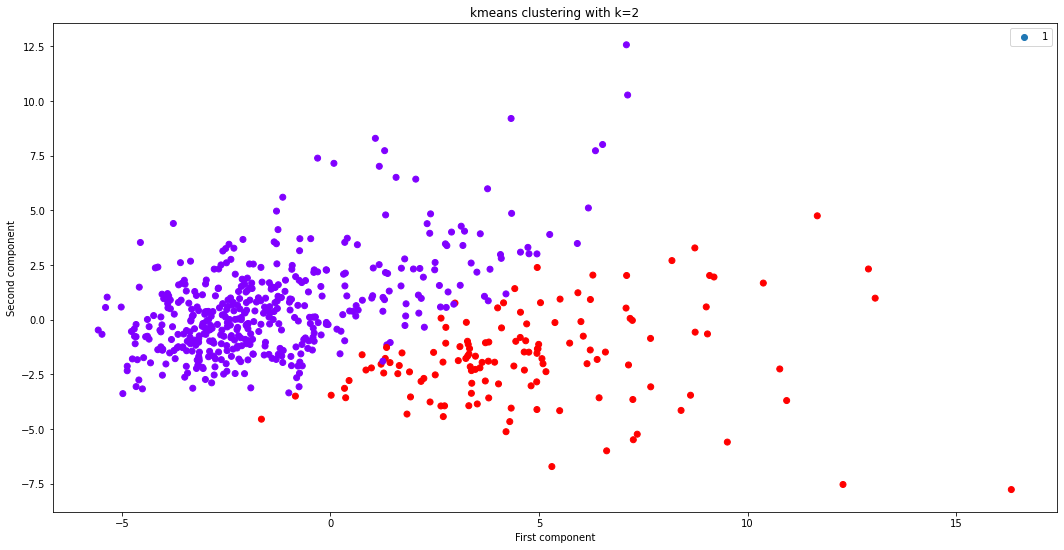

In [103]:
fig = plt.figure(figsize=(18, 9))
plt.scatter(y_pca2[:,0],y_pca2[:,1],c=kmeans2.labels_,cmap='rainbow')
plt.legend(kmeans2.labels_)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('kmeans clustering with k=2')

# kmeans clustering where k=3 on the plane of the first two components

In [104]:
kmeans3 = KMeans(n_clusters = 3, init = 'random', random_state = 101).fit(df)

In [107]:
kmeans3.labels_

array([2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [105]:
kmeans3.cluster_centers_

array([[1.23865204e+01, 1.84309592e+01, 7.99461391e+01, 4.81294964e+02,
        9.45352758e-02, 8.94614149e-02, 5.90838866e-02, 3.16443022e-02,
        1.77725420e-01, 6.35394484e-02, 2.98327338e-01, 1.21594317e+00,
        2.11455803e+00, 2.28588441e+01, 7.16755635e-03, 2.32263669e-02,
        2.82199871e-02, 1.04940384e-02, 2.07394269e-02, 3.74343237e-03,
        1.38052974e+01, 2.44523261e+01, 9.02959952e+01, 5.96283933e+02,
        1.29173261e-01, 2.17934652e-01, 2.10555748e-01, 8.82334796e-02,
        2.81859472e-01, 8.30209353e-02],
       [2.21940625e+01, 2.21296875e+01, 1.47653125e+02, 1.55836250e+03,
        1.04681250e-01, 1.65026875e-01, 2.25553125e-01, 1.27450938e-01,
        1.89900000e-01, 5.98256250e-02, 1.02423125e+00, 1.16844375e+00,
        7.21434375e+00, 1.55384687e+02, 6.74162500e-03, 3.36643750e-02,
        4.68375000e-02, 1.60515625e-02, 1.87737500e-02, 3.78303125e-03,
        2.82746875e+01, 2.94853125e+01, 1.89765625e+02, 2.47881250e+03,
        1.43500000e-01,

Text(0.5, 1.0, 'kmeans clustering with k=3')

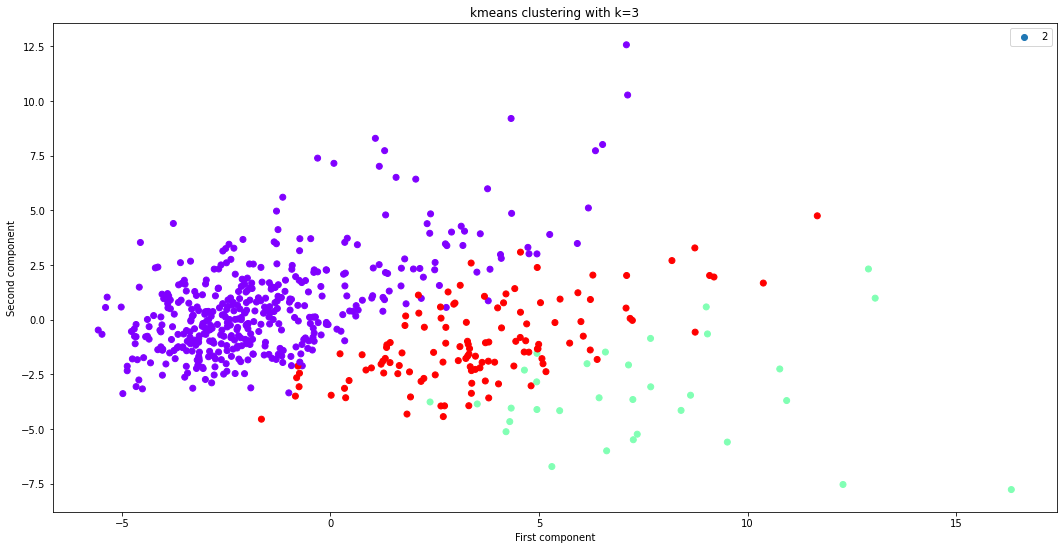

In [106]:
fig = plt.figure(figsize=(18, 9))
plt.scatter(y_pca2[:,0],y_pca2[:,1],c=kmeans3.labels_,cmap='rainbow')
plt.legend(kmeans3.labels_)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('kmeans clustering with k=3')

# kmeans clustering where k=5 on the plane of the first two components

In [109]:
kmeans5 = KMeans(n_clusters = 5, init = 'random', random_state = 101).fit(df)

In [111]:
kmeans5.labels_

array([3, 3, 3, 0, 3, 2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 0,
       2, 4, 3, 1, 2, 1, 1, 1, 3, 2, 1, 3, 1, 1, 2, 0, 2, 2, 2, 0, 3, 2,
       2, 3, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 3, 0, 3, 2, 0, 1, 2, 3, 3, 2, 0, 2, 4, 1, 0, 3, 2, 3,
       0, 2, 2, 2, 2, 2, 1, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 3, 3, 2, 2, 2, 2, 3, 2, 3, 0, 1,
       1, 2, 3, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 0, 0, 3, 3, 0, 4, 2, 0, 1, 3, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 2, 0, 4, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1,
       3, 2, 2, 1, 3, 1, 2, 2, 0, 1, 2, 2, 3, 0, 4, 1, 2, 2, 0, 0, 3, 4,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 3, 0, 2, 4, 3, 2, 1, 2, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 3, 0, 3, 1, 3, 2, 3, 2, 1, 1, 3, 1, 1, 2,
       1, 4, 0, 2, 2, 0, 2, 0, 4, 0, 1, 0, 0, 1, 2, 2, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 3,

In [110]:
kmeans5.cluster_centers_

array([[1.11208615e+01, 1.78965801e+01, 7.13068398e+01, 3.83437229e+02,
        9.47397835e-02, 7.93493939e-02, 4.41935745e-02, 2.27446840e-02,
        1.77826407e-01, 6.49625541e-02, 2.85268831e-01, 1.34519177e+00,
        2.00072641e+00, 1.94101212e+01, 8.17596104e-03, 2.23134242e-02,
        2.73480632e-02, 1.00183420e-02, 2.26179654e-02, 3.98559394e-03,
        1.22411645e+01, 2.36265368e+01, 7.93296970e+01, 4.62196537e+02,
        1.29254199e-01, 1.76428225e-01, 1.55988203e-01, 6.74398355e-02,
        2.74937662e-01, 8.18309524e-02],
       [1.69232857e+01, 2.12971429e+01, 1.11324286e+02, 8.94567143e+02,
        1.00382857e-01, 1.29683857e-01, 1.37443429e-01, 7.79864286e-02,
        1.87252857e-01, 6.10062857e-02, 5.23225714e-01, 1.24789714e+00,
        3.71277143e+00, 5.63147143e+01, 6.83152857e-03, 2.90843714e-02,
        3.76850000e-02, 1.44554857e-02, 1.89682429e-02, 3.88911429e-03,
        2.00390000e+01, 2.88142857e+01, 1.33042857e+02, 1.23736286e+03,
        1.41295429e-01,

Text(0.5, 1.0, 'kmeans clustering with k=5')

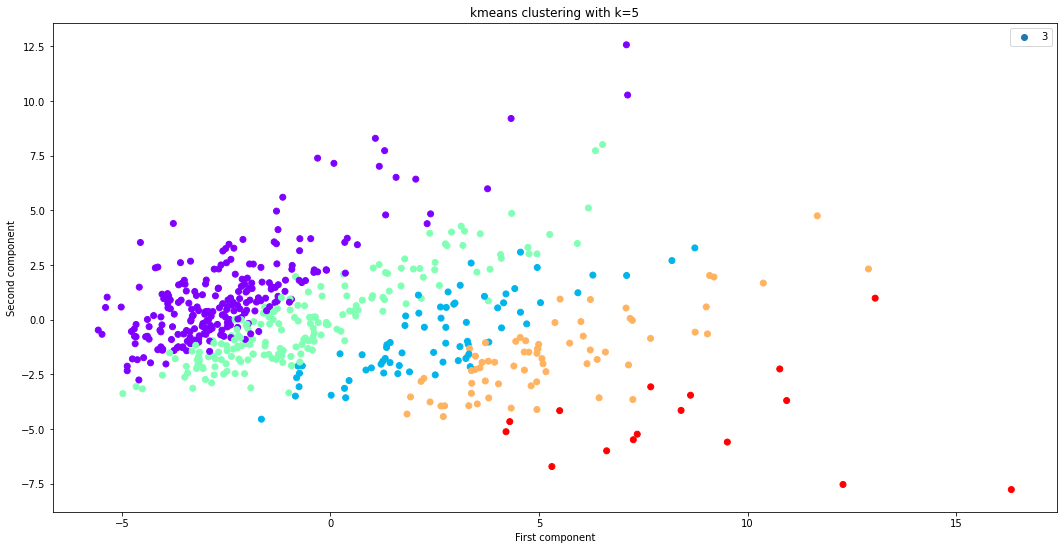

In [112]:
fig = plt.figure(figsize=(18, 9))
plt.scatter(y_pca2[:,0],y_pca2[:,1],c=kmeans5.labels_,cmap='rainbow')
plt.legend(kmeans5.labels_)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('kmeans clustering with k=5')

Text(0, 0.5, 'Second component (texture_mean)')

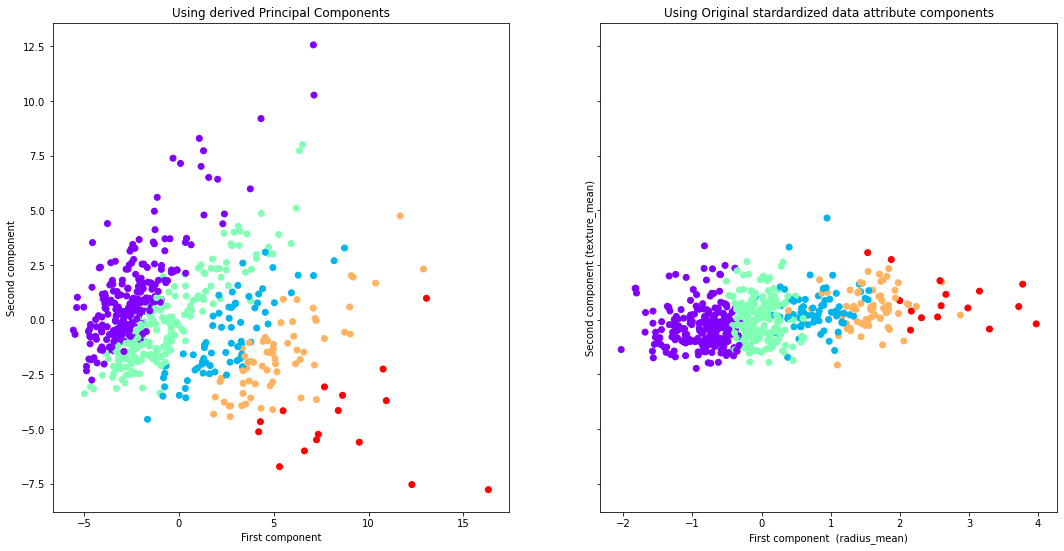

In [200]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(18, 9))
ax1.set_title('Using derived Principal Components')
ax1.scatter(y_pca2[:,0],y_pca2[:,1],c=kmeans5.labels_,cmap='rainbow')
ax1.set_xlabel('First component')
ax1.set_ylabel('Second component')
ax2.set_title('Using Original stardardized data attribute components')
ax2.scatter(df1['radius_mean'], df1['texture_mean'],c=kmeans5.labels_,cmap='rainbow')
ax2.set_xlabel('First component  (radius_mean)')
ax2.set_ylabel('Second component (texture_mean)')

In [201]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Purity measure for kmeans clustering where k=2

In [202]:
kmeans2_p = KMeans(n_clusters = 2, init = 'random', random_state = 0)

In [206]:
df_p = cancer.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [207]:
kmeans2_p.fit(df_p)

KMeans(init='random', n_clusters=2, random_state=0)

In [208]:
y_pred = kmeans2_p.predict(df_p)

In [209]:
contingency_matrix = metrics.cluster.contingency_matrix(df_p['diagnosis'], y_pred)
purity_score = np.sum(np.amax(contingency_matrix, axis = 0)) / np.sum(contingency_matrix)

In [211]:
print(purity_score)

0.8541300527240774


### Purity measure for kmeans clustering where k=3

In [212]:
kmeans3_p = KMeans(n_clusters = 3, init = 'random', random_state = 0)

In [213]:
kmeans3_p.fit(df_p)

KMeans(init='random', n_clusters=3, random_state=0)

In [215]:
y_pred = kmeans3_p.predict(df_p)

In [216]:
contingency_matrix = metrics.cluster.contingency_matrix(df_p['diagnosis'], y_pred)
purity_score = np.sum(np.amax(contingency_matrix, axis = 0)) / np.sum(contingency_matrix)

In [217]:
print(purity_score)

0.8840070298769771


### Purity measure for kmeans clustering where k=5

In [218]:
kmeans5_p = KMeans(n_clusters = 5, init = 'random', random_state = 0)

In [219]:
kmeans5_p.fit(df_p)

KMeans(init='random', n_clusters=5, random_state=0)

In [220]:
y_pred = kmeans5_p.predict(df_p)

In [221]:
contingency_matrix = metrics.cluster.contingency_matrix(df_p['diagnosis'], y_pred)
purity_score = np.sum(np.amax(contingency_matrix, axis = 0)) / np.sum(contingency_matrix)

In [222]:
print(purity_score)

0.8910369068541301


# For K=5,the Purity Score is close to 1 compared to other clusterings, So this clustering(k=5) can be used for classification, because Bad clusterings have purity values close to 0, aand a perfect  and good clustering has a purity of 1

In [2]:
pca_df1.head()

NameError: name 'pca_df1' is not defined

In [ ]:
-(pca_df1[target==1].value_count()/)

In [1]:
b = pca_df1[pca_df1['target']==1].count()[0]
b

NameError: name 'pca_df1' is not defined

In [245]:
c = pca_df1[pca_df1['target']==0].count()[0]
c

357

In [252]:
d = b+c

In [256]:
target_entropy = -((b/d)*np.log2((b/d))+(c/d)*np.log2(c/d))

In [257]:
target_entropy

0.9526351224018599

In [261]:
kmeans3_pp = KMeans(n_clusters = 3, init = 'random', random_state = 0)

In [263]:
kmeans3_pp.fit(y_pca2)

KMeans(init='random', n_clusters=3, random_state=0)

In [265]:
y_pred = kmeans3_pp.predict(y_pca2)

In [270]:
Categorical_df['label'] = pd.DataFrame(kmeans3_pp.labels_)

In [282]:
c1 = Categorical_df[Categorical_df['label']==0].count()['label']

In [283]:
c2 = Categorical_df[Categorical_df['label']==1].count()['label']

In [284]:
c3 = Categorical_df[Categorical_df['label']==2].count()['label']

In [288]:
e = c1+c2+c3

In [293]:
cluster_entropy = -((c1/e)*np.log2(c1/e)+(c2/e)*np.log2(c2/e)+(c3/e)*np.log2(c3/e))

In [294]:
cluster_entropy

1.3387779507862527

In [295]:
cluster_entropy-target_entropy

0.38614282838439284